# Volatility Insights


Volatility quantifies the degree of variation in the price of an asset over time.

In the realm of quantitative finance, understanding and accurately measuring volatility is paramount for effective risk management and investment decision-making. Volatility, often viewed as a measure of uncertainty or risk, plays a crucial role in pricing derivatives, constructing portfolios, and assessing market conditions. This Jupyter notebook aims to provide a comprehensive exploration of volatility calculation methods, beginning with the foundational concept of historical volatility, which is derived from the standard deviation of continuous compounded returns. 


In the study of financial markets, volatility is a critical concept that can be understood through various lenses.

As we delve deeper, we will examine the critical assumption of independent and identically distributed (i.i.d.) returns, a cornerstone of many financial models. However, real-world financial data often deviates from this assumption, necessitating alternative approaches to volatility estimation. To address this, we will explore four advanced methodologies: GARCH models, exponential moving averages, rolling window volatility, and non-parametric methods. Additionally, we will discuss implied volatility, which reflects market expectations derived from option pricing, and machine learning techniques that leverage modern computational power to enhance volatility forecasting. 

### Historical Volatility 

 is typically calculated using the annualized standard deviation of continuous daily compounded returns.
 
This method involves first computing the daily returns of an asset, which are derived from the natural logarithm of the ratio of consecutive prices. The standard deviation of these daily returns is then calculated and annualized to provide a measure of volatility over a year.

A higher standard deviation indicates greater price fluctuations, suggesting that the asset is more volatile and carries higher risk. Conversely, a lower standard deviation implies more stable prices, indicating that the asset is less volatile and may be considered a safer investment. Understanding historical volatility is crucial for investors and risk managers, as it helps in assessing the risk associated with an asset and making informed decisions regarding portfolio construction and risk management strategies.



**Historical Volatility Calculation Steps:**

1.Data Collection: Gather one year of historical daily price data: {$S_t$​}, where t ranges from 0 to T (typically 250 trading days) 

2.Calculate Daily Compounded Returns: $ r_t = \ln\left(\frac{S_t}{S_{t-1}}\right)$, where $S_t$ denotes the price at time $t$.
   
3.Assume that compounded returns are independent and identically distributed (i.i.d.)

4.Calculate Standard Deviation of Daily Returns

5.Annualization: To express this volatility on an annualized basis, you multiply the standard deviation of the daily returns by the square root of the number of trading days in a year (commonly 250):


**Summary**:

**Annualized Volatility**: The annualized volatility of daily compounded returns serves as a key measure of historical volatility, offering valuable insights into an asset's past price fluctuations and overall risk profile.

**Definition of Historical Volatility**: Historical volatility reflects the degree to which an asset's price has varied over a specified period in the past. It quantifies the asset's price movements, helping investors understand its behavior in different market conditions.

**Role in Risk Assessment**: Investors frequently utilize historical volatility to assess the risk associated with an asset. By analyzing past price behavior, they can make informed decisions regarding investment strategies, portfolio construction, and risk management.

The Python code below illustrates the calculation of historical volatility using simple data, providing a practical example of how to apply these concepts in a real-world context:


In [50]:

# Create a DataFrame with the given data
data = {
    'Day': [1, 2, 3, 4, 5],
    'Price': [100, 102, 101, 105, 104]
}

df = pd.DataFrame(data)

# Calculate Daily Holding Returns (R)
df['Daily_Holding_Returns'] = df['Price'].pct_change()

# Calculate Continuously Compounded Returns (r)
df['Continuously_Compounded_Returns'] = np.log(df['Price'] / df['Price'].shift(1))

# Drop the first row with NaN values resulting from the calculations
df = df.dropna()

# Calculate Daily Volatility (standard deviation of continuously compounded returns)
daily_volatility = df['Continuously_Compounded_Returns'].std()

# Calculate Annualized Volatility
annualized_volatility = daily_volatility * np.sqrt(250)

# Display the results
print("Daily Holding Returns:")
print(df[ 'Daily_Holding_Returns'])
print("\nContinuously Compounded Returns:")
print(df[['Price', 'Continuously_Compounded_Returns']])
print(f"Historical Volatility: {annualized_volatility:.4f}")


Daily Holding Returns:
1    0.020000
2   -0.009804
3    0.039604
4   -0.009524
Name: Daily_Holding_Returns, dtype: float64

Continuously Compounded Returns:
   Price  Continuously_Compounded_Returns
1    102                         0.019803
2    101                        -0.009852
3    105                         0.038840
4    104                        -0.009569
Historical Volatility: 0.3769




### Remarks

- **Time Frame**: The choice of time frame for historical data can significantly impact the calculation of historical volatility. Different periods may yield varying results due to fluctuations in market conditions and the statistical properties of returns. Therefore, it is crucial to consider the context and specific time frame being analyzed when calculating historical volatility, as this can influence risk assessments and investment decisions.

- **The i.i.d. Assumption of Continuous Compounded Returns**: While the assumption of independent and identically distributed (i.i.d.) returns simplifies the calculation of historical volatility, it may not accurately capture the complexities of real-world financial markets. Financial returns often exhibit characteristics such as volatility clustering, autocorrelation, and fat tails, which can lead to deviations from the i.i.d. assumption. As a result, relying solely on this assumption may lead to an incomplete understanding of an asset's risk profile.



### Testing the i.i.d. Assumption

Before relying on the assumption of independent and identically distributed (i.i.d.) returns for calculations like historical volatility, it is essential to determine whether this assumption holds for your data. Several checks and analyses can help assess the validity of the i.i.d. assumption:

#### Methods to Assess the i.i.d. Assumption

- **Statistical Tests for Independence**:
   - **Autocorrelation Function (ACF)**: Calculate the autocorrelation of the returns. If the autocorrelations are significantly different from zero at various lags, it suggests that the returns are not independent.
   - **Ljung-Box Test**: This statistical test checks for the presence of autocorrelation in a time series. A significant result indicates that the returns are not independent.

- **Statistical Tests for Identical Distribution**:
   - **Kolmogorov-Smirnov Test**: This test compares the empirical distribution of the returns to a specified distribution (e.g., normal distribution). A significant result suggests that the returns do not follow the assumed distribution.
   - **Shapiro-Wilk Test**: This test assesses the normality of the returns. If the test indicates that the returns are not normally distributed, it suggests that the identical distribution assumption may not hold.

- **Visual Inspection**: Visualization is a standard practice in financial analysis, providing a more accurate representation of the asset's price movements and allowing for better assessment of the underlying statistical properties.
   - **Time Series Plot of Continuously Compounded Returns**: This plot allows you to visually inspect for trends, patterns, or clustering in the returns. Look for periods of high volatility (large fluctuations) and low volatility (smaller fluctuations), as well as any apparent trends (upward or downward movements).
   - **Histogram**: Plotting the frequency distribution of the continuously compounded returns helps visualize how the returns are distributed and whether they exhibit characteristics of normality (e.g., a bell-shaped curve).
   - **Q-Q Plot**: In a Q-Q plot, compare the quantiles of the continuously compounded returns against the quantiles of a theoretical normal distribution (or another specified distribution). If the points deviate significantly from the diagonal line, it suggests that the returns do not follow the assumed distribution, indicating a potential violation of the i.i.d. assumption.

- **Volatility Clustering**:
   - **Rolling Standard Deviation**: Calculate the rolling standard deviation of returns over time. If the standard deviation changes significantly, it indicates that volatility is not constant, violating the i.i.d. assumption.

### When to Avoid Using the i.i.d. Assumption

1. **Presence of Autocorrelation**: If tests indicate significant autocorrelation in the returns, it suggests that past returns influence future returns, violating the independence assumption.

2. **Changing Volatility**: If you observe volatility clustering or significant changes in the standard deviation over time, the returns are likely not identically distributed.

3. **Non-Normality**: If the returns do not follow a normal distribution (as indicated by statistical tests or visual inspections), the assumption of identical distribution may not be valid.

4. **Market Events**: During periods of significant market events (e.g., financial crises, major economic announcements), the behavior of returns may change, making the i.i.d. assumption less applicable.

5. **Long-Term Analysis**: For long-term analyses, the i.i.d. assumption may be less valid due to structural changes in the market, economic conditions, or investor behavior over time.



### If the Assumption of i.i.d. Continuously Compounded Returns Fails

When the assumption of independent and identically distributed (i.i.d.) continuously compounded returns does not hold, several alternative approaches can be employed to calculate volatility—a measure of price fluctuation—that accounts for dependencies, changing volatility, and non-normality. Methods such as GARCH models, exponential moving averages, rolling window volatility, non-parametric methods, implied volatility, and machine learning techniques are all viable options. The choice of method depends on the specific characteristics of the data, the context of the analysis, and the objectives of the volatility assessment. Below are details on one of these methods:

### 1. GARCH Models (Generalized Autoregressive Conditional Heteroskedasticity)

GARCH models are specifically designed to model time-varying volatility. They allow for the volatility of returns to change over time based on past returns and past volatility, making them particularly useful in financial markets where volatility is not constant.

**Implementation**:
- **Model Fitting**: Fit a GARCH model to the return series. The model estimates the conditional variance of returns based on past squared returns and past variances.
- **Volatility Estimation**: Use the estimated conditional variance as a measure of volatility, which reflects the changing nature of volatility over time.

The fitted GARCH model provides an estimated daily conditional volatility, which reflects the model's predictions based on historical data. This time-varying volatility is a valuable measure for understanding the risk associated with an asset's price movements. Additionally, it can be annualized for broader financial analysis.

The code below illustrates how to implement a GARCH model to estimate volatility that provides a practical example of how to apply GARCH models to estimate volatility, allowing for a more nuanced understanding of risk in financial analysis:


In [51]:
import numpy as np
import pandas as pd
from arch import arch_model

# Generate some synthetic daily continuously compounded returns data
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # normally distributed - a common assumption in statistical modeling & risk assessment

# Fit a GARCH(1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Estimate GARCH daily volatility
garch_volatility = garch_fit.conditional_volatility

# Annualize GARCH daily volatility
annualized_volatility = garch_volatility * np.sqrt(252)

print("Annualized GARCH Volatility:\n", annualized_volatility)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 4488.113750684418
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1441.6532640080381
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1397.4377335583126
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1397.4267922813399
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1511.0981687294732
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1510.3165787045446
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1504.1226252673584
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1417.4101255529754
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1397.7880948636684
Iteration:     10,   Func. Count:     62,   Neg. LLF: 60252.36911013471
Iteration:     11,   Func. Count:     72,   Neg. LLF: 549395697.0008721
Iteration:     12,   Func. Count:     80,   Neg. LLF: 1398.105292657417
Iteration:     13,   Func. Count:     87,   Neg. LLF: 1471.720128879787
Iteration:     14,   Func. Count:     93,   Neg. LLF: 14


### 2. Exponential Moving Average (EMA) Volatility

Exponential Weighting: The EMA model applies an exponential weighting to these squared continuously compounded returns. This means that more recent squared continuously compounded returns have a greater influence on the calculated volatility than older squared returns. In other words, the EMA approach gives more weight to recent observations, making it responsive to recent price changes while still considering historical data.

The Exponential Moving Average (EMA) Volatility is calculated as an exponentially weighted moving average of the squared returns ($R^2$) using the formula:


 $\sigma_t^2 = \alpha R_t^2 + (1 - \alpha) \sigma_{t-1}^2$ 
 
 where $R_t^2$​ represents the the squared continuously compounded return at time $t$, $\sigma_{t-1}^2$ the estimated variance at the previous time point, and $\alpha$ is a smoothing parameter ($0 < \alpha< 1$), which determines how much weight is given to the most recent squared return.

**Remarks**:

EMA approach captures the dynamic nature of volatility, as it allows for more recent price movements to have a greater impact on the estimated volatility, making it responsive to changing market conditions. 

This method is particularly useful as it allows you to quickly assess the changing volatility of an asset over time.

In [52]:
import pandas as pd

# Generate synthetic daily continuously compounded returns data
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # simulated returns using normally distributed assumption 

returns_series = pd.Series(returns) #Creating a Pandas Series

# Calculate Exponential Moving Average (EMA) volatility
alpha = 0.94  # smoothing parameter between 0 and 1
ema_volatility = returns_series.ewm(span=30).std()  # using ewm method in pandas to compute the 30-day EMA
print("EMA Volatility:\n", ema_volatility)


EMA Volatility:
 0           NaN
1      0.448998
2      0.420066
3      0.698170
4      0.728882
         ...   
995    0.950441
996    1.052877
997    1.036129
998    1.009796
999    0.991321
Length: 1000, dtype: float64


### 3. Rolling Window Volatility

This method calculates volatility over a fixed-size rolling window, allowing for the capture of changing volatility over time.
  
Implementation:
  - Choose a window size (e.g., 30 days) and calculate the standard deviation of returns within that window. As new data points are added, the oldest data points are dropped, maintaining a constant window size.

In [53]:
import pandas as pd

# Generate some synthetic daily returns data
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # Simulated returns
returns_series = pd.Series(returns) #Create a Pandas Series

# Calculate rolling window volatility
rolling_window_volatility = returns_series.rolling(window=30).std()  # 30-day rolling window

print("Rolling Window Volatility:\n", rolling_window_volatility)


Rolling Window Volatility:
 0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    1.003840
996    1.072732
997    1.016170
998    1.016559
999    1.004970
Length: 1000, dtype: float64



### 4. Non-Parametric Methods

-  Non-parametric methods do not assume a specific distribution for returns and can be useful when the normality assumption fails.
  
Implementation**:
  - Use techniques such as kernel density estimation to estimate the distribution of returns and calculate volatility based on the empirical distribution.



In [54]:
import numpy as np
import pandas as pd

# Generate some synthetic daily returns data
np.random.seed(42)
returns = np.random.normal(0, 1, 1000)  # Simulated returns
returns_series = pd.Series(returns)

# Calculate empirical volatility (standard deviation)
empirical_volatility = returns_series.std()
print("Empirical Volatility (Non-Parametric):", empirical_volatility)


Empirical Volatility (Non-Parametric): 0.9792159381796758


### 6. Machine Learning Approaches

- ML/AI models can be trained to predict volatility based on various features, including historical returns, trading volume, and macroeconomic indicators.
  
Implementation:
  - Use regression models, neural networks, or other machine learning techniques to model and predict volatility based on historical data and other relevant features.

Machine learning (ML) and artificial intelligence (AI) have become increasingly important in financial markets, particularly for predicting volatility. By leveraging historical data and various features, these models can provide insights that traditional methods may overlook. Below are some key aspects of implementing ML approaches for volatility prediction.

Key Features for Volatility Prediction

1. **Historical Returns**: Past price movements can provide valuable information about future volatility. Features can include daily returns, moving averages, and return volatility over different time frames.

2. **Trading Volume**: Changes in trading volume can signal shifts in market sentiment and potential volatility. Features may include average trading volume, volume spikes, and volume relative to historical averages.

3. **Macroeconomic Indicators** such as interest rates, inflation rates, and employment figures can influence market volatility. Incorporating these indicators can enhance model accuracy.

4. **Market Sentiment**: Sentiment analysis from news articles, social media, and financial reports can provide insights into market psychology, which can be a precursor to volatility.

5. **Technical Indicators**: Features derived from technical analysis, such as Bollinger Bands, Relative Strength Index (RSI), and moving average convergence divergence (MACD), can also be useful.


Implementation Steps:

1. Data Collection: Gather historical price data, trading volume, macroeconomic indicators, and sentiment data. Ensure the data is clean and preprocessed for analysis.

2. Feature Engineering: Create relevant features from the raw data. This may involve calculating returns, normalizing data, and creating lagged variables to capture temporal relationships.

3. Model Selection:
   - Regression Models: Linear regression, Lasso, and Ridge regression can be used for predicting continuous volatility measures.
   - Neural Networks: Deep learning models (eg LSTM) can capture complex patterns in time series data.
   - Ensemble Methods: Random Forests or Gradient Boosting models 

4. Training: Split the data into training and testing sets. Train the selected models on the training set and validate their performance on the testing set.

5. Evaluation Metrics: Use metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to evaluate model performance. Additionally, consider using backtesting to assess how well the model would perform in a real trading scenario.

6. Hyperparameter Tuning: Optimize model parameters using techniques like Grid Search to improve performance.

7. Deployment: Once the model has been trained and validated, it can be deployed in a production environment where it can make real-time predictions.

8. Monitoring and Maintenance: Continuously monitor the model performance, and make updates as necessary to adapt to changing market conditions.


The code below illustrates a machine learning model to predict stock market volatility using a linear regression model. It calculates volatility based on historical returns based on historical stock price data:

In [55]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [57]:

# Step 1: Data Collection
# Download historical stock data (e.g., Apple Inc.)
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [58]:
# Check the structure of the DataFrame
print(data.head())
print(data.columns)  # Print the column names


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.879883  179.734931  174.653844  174.771775  104487900
2022-01-04  176.609619  179.793905  176.039592  179.489238   99310400
2022-01-05  171.911835  177.071549  171.636651  176.521181   94537600
2022-01-06  169.042068  172.285320  168.688259  169.730027   96904000
2022-01-07  169.209122  171.145244  168.088727  169.916741   86709100
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [59]:
# Check the data types of the columns
print(data.dtypes)

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object


Mean Squared Error: 4.638130586758188e-05


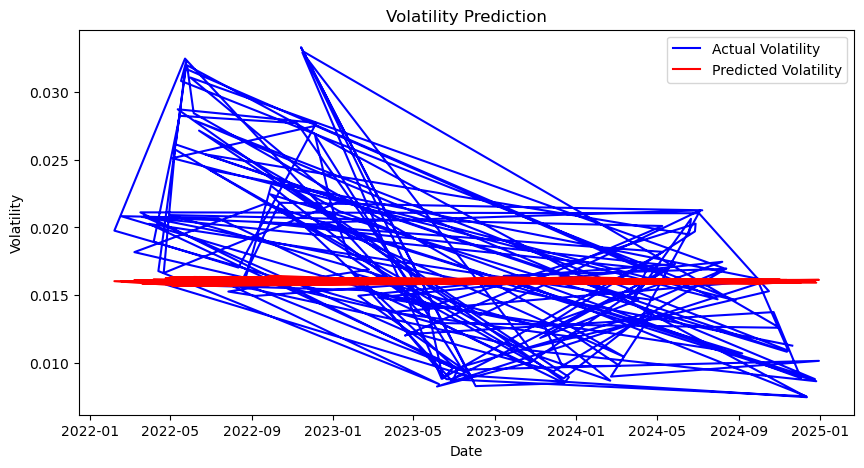

In [60]:

# Step 2: Feature Engineering
# Calculate daily returns
data['Return'] = data['Close'].pct_change()  #Using Simple Returns
data['Volatility'] = data['Return'].rolling(window=21).std()  # 21 trading days for 1 month

# Drop NaN values
data.dropna(inplace=True)

# Step 3: Prepare Features and Target
# Use previous returns as features
X = data[['Return']].shift(1).dropna()  # Lagged return
y = data['Volatility'][1:]  # Current volatility

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Visualize Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Volatility', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Volatility', color='red')
plt.title('Volatility Prediction')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()



In financial analysis, you can use either **simple returns** (percentage change) or **continuously compounded returns** (log returns) depending on your specific needs and the context of your analysis. Here’s a brief overview of both methods:

### Simple Returns:

are calculated as the percentage change in price from one period to the next. The formula for calculating simple returns is: 

$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1 $

In Python, simple returns can be calculated using the `pct_change()` method from the pandas library:

### Log Returns (continuously compounded returns):

are calculated using the natural logarithm of the ratio of consecutive prices:

$r_t = \ln (R_t +1) = \ln\left(\frac{P_t}{P_{t-1}}\right)$

Log returns (continuously compounded returns) are particularly useful in financial analysis for several reasons:

- They are more mathematically convenient for certain types of analysis, especially in portfolio theory and risk management.
- Log returns are additive over time, which means that the total return over multiple periods can be calculated by simply summing the log returns for each period.

In Python, log returns can be calculated using np.log(prices / prices.shift(1))


**Which One to Use?**

- **Simple Returns**: These are easier to interpret and are commonly used in many financial analyses. They are suitable for short-term analyses and when dealing with small price changes.

- **Log Returns**: These are more appropriate for certain analytical contexts, particularly when returns are assumed to be normally distributed. They are beneficial for long-term analyses, portfolio optimization, and risk management due to their additive properties.

Ultimately, the choice between simple returns and log returns depends on the specific requirements of your analysis and the characteristics of the data you are working with.


#### Conclusion

Machine learning approaches for predicting volatility can provide significant advantages in financial decision-making. By carefully selecting features, choosing appropriate models, and rigorously evaluating performance, practitioners can develop robust systems that enhance their understanding of market dynamics and improve trading strategies.

## Implied Volatility


 is derived from the market price of options and reflects the market's expectations of future volatility. It indicates how much the market anticipates the asset's price will move in the future. This measure can provide valuable insights into market sentiment and expectations, especially during periods of uncertainty.
Implementation

The calculation of implied volatility for a call option can be performed using the Black-Scholes model. In this approach, we compute the theoretical option price and then calculate the implied volatility by solving for the volatility that equates the theoretical option price to the market price. This is a common method in finance for assessing the market's expectations of future volatility.

Note: This calculation requires option price data. Below, I will use the scipy library to calculate the implied volatility of a call option using the Black-Scholes option pricing model.


   - `scipy.stats.norm` module provides functions for working with the normal distribution, including the cumulative distribution function (CDF), which is used in the Black-Scholes formula
   - `scipy.optimize.brentq` function is s a root-finding algorithm that is used to find the root of a function (i.e., where the function equals zero) using Brent's method.

Black-Scholes Call Option Price calculation:

   - **Parameters**:
     - `S`: Current stock price.
     - `K`: Strike price of the option.
     - `T`: Time to expiration (in years).
     - `r`: Risk-free interest rate (annualized).
     - `sigma`: Volatility of the underlying asset (annualized).
   - **Calculations**:
     - `d1` and `d2` are intermediate variables used in the Black-Scholes formula:
       - $d1 = \frac{\ln(S/K) + (r + 0.5 \sigma^2) T}{\sigma \sqrt{T}}$
       - $d2 = d1 - \sigma \sqrt{T}$
     - Then, the price of the call option using the Black-Scholes formula:
       
       $C = S \cdot N(d1) - K \cdot e^{-rT} \cdot N(d2)$,

       where $N(d)$ \)$ is the cumulative distribution function of the standard normal distribution.


 - **Implied Volatility Calculation**:
 
   - **Parameter**:
     - `market_price`: The market price of the call option.
   - **Objective Function**:
     - This nested function calculates the difference between the theoretical call option price (calculated using Black-Scholes where volatility is `sigma`) and the market price of the option.
   - **Finding the root of the objective function using Brent's method**:
     - The algorithm searches for a value of `sigma` between $1 \times 10^{-6}$ and $5$\)$ that makes the objective function equal to zero, effectively finding the implied volatility.


 

In [61]:

from scipy.stats import norm
from scipy.optimize import brentq

def black_scholes_call(S, K, T, r, sigma):
    """This calculates the Black-Scholes call option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def implied_volatility_call(S, K, T, r, market_price):
    """This calculates implied volatility using the Black-Scholes model."""
    def objective_function(sigma):
        return black_scholes_call(S, K, T, r, sigma) - market_price

    # Use Brent's method to find the root
    return brentq(objective_function, 1e-6, 5)

# Example parameters
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05  # Risk-free interest rate
market_price = 10  # Market price of the call option

implied_vol = implied_volatility_call(S, K, T, r, market_price)
print("Implied Volatility:", implied_vol)


Implied Volatility: 0.1879716494569096




### Conclusion

In conclusion, the ability to accurately measure and forecast volatility is essential for any quantitative analyst or financial professional. This Jupyter notebook has provided a detailed examination of both traditional and contemporary methods for calculating volatility, highlighting the importance of adapting our approaches to the underlying data characteristics. From the foundational historical volatility to advanced techniques such as GARCH models and machine learning, each method offers unique insights and advantages depending on the context of the analysis.



### Application


In the past 3-4 weeks, the financial markets have experienced significant fluctuations, largely driven by the introduction of new tariff rules. These changes have created uncertainty among investors, leading to increased volatility in asset prices. 

Understanding and measuring this volatility is crucial for assessing market risk and making informed investment decisions.

Steps:

Gathering relevant data for the analysis, including:
- Historical price data for the assets or indices of interest (e.g., stock prices, indices).
- Trading volume data to assess market activity.
- Macroeconomic indicators that may be affected by the tariff rules.
- Option price data if you plan to calculate implied volatility.


Using the historical price data, calculate the historical volatility for the recent weeks. This will provide insights into how much the asset prices have fluctuated during this period.


If you have access to options data, calculate the implied volatility for relevant options during this period. This will help you understand market expectations regarding future volatility.


Create visualizations to illustrate the volatility trends over the past few weeks. You can use:
- Time series plots of asset prices and their historical volatility.
- Bar charts showing trading volume changes.
- Q-Q plots or histograms to assess the distribution of returns.


Example python code below:

In [62]:

import yfinance as yf

# Step 1: Data Collection
# Download historical stock data (e.g., Dow Jones)
ticker = '^DJI'  # Use '^DJI' for Dow Jones Industrial Average
data = yf.download(ticker, start='2025-04-01', end='2025-04-30')

# Display the data
print(data)


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open      Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI        ^DJI
Date                                                                          
2025-04-01  41989.960938  42140.660156  41519.898438  41879.750000   514610000
2025-04-02  42225.320312  42382.269531  41629.699219  41736.078125   492050000
2025-04-03  40545.929688  41173.621094  40513.109375  40986.519531   941940000
2025-04-04  38314.859375  40097.898438  38264.871094  40097.898438  1290100000
2025-04-07  37965.601562  39207.019531  36611.781250  37879.648438  1363960000
2025-04-08  37645.589844  39426.601562  37103.859375  38827.101562  1051220000
2025-04-09  40608.449219  40778.699219  37275.691406  37387.910156  1412960000
2025-04-10  39593.660156  39996.929688  38427.699219  39996.929688  1023490000
2025-04-11  40212.710938  40404.269531  39255.210938  39493.421875   742800000
2025-04-14  40524.789062  40778.289062  40159.019531

Historical Volatility: 44.31%


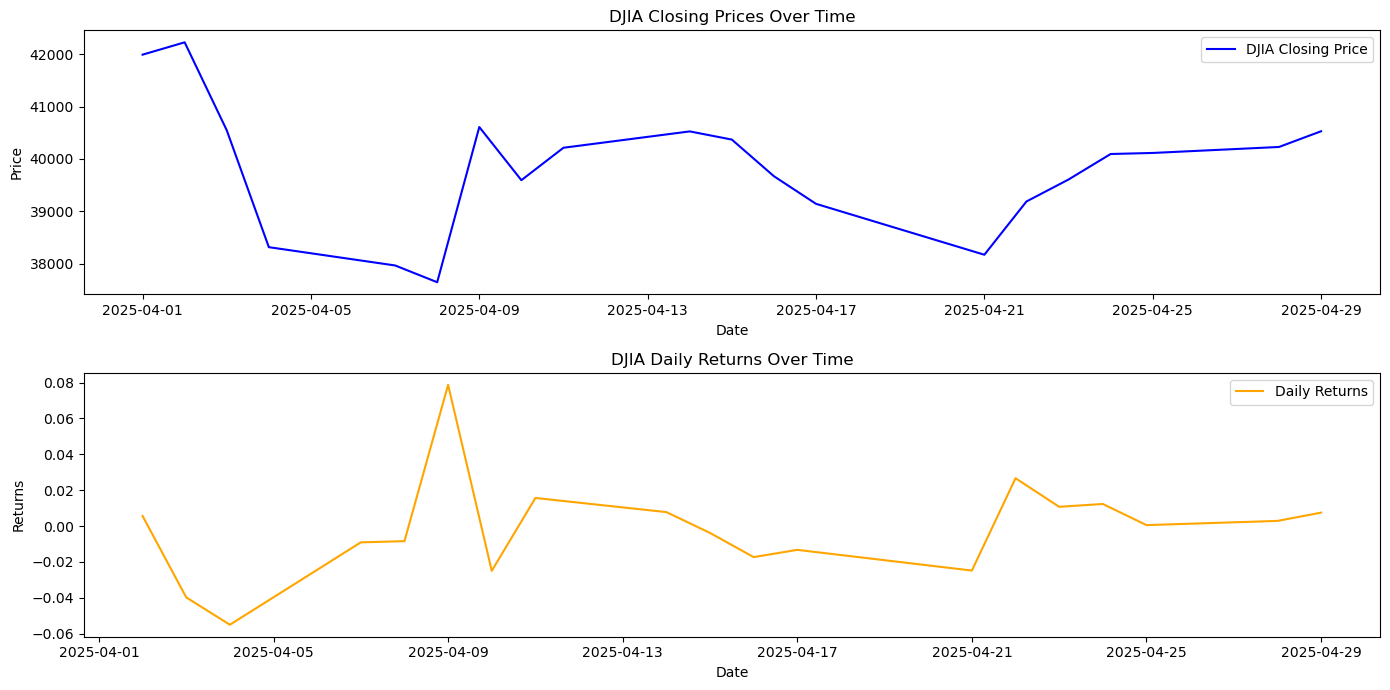

In [63]:

# Step 2: Calculate daily returns
data['Returns'] = data['Close'].pct_change()

# Step 3: Calculate historical volatility (annualized)
historical_volatility = data['Returns'].std() * np.sqrt(252)  # Assuming 252 trading days
print(f'Historical Volatility: {historical_volatility:.2%}')

# Step 4: Plotting the DJIA closing prices and returns
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='DJIA Closing Price', color='blue')
plt.title('DJIA Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot returns
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Returns'], label='Daily Returns', color='orange')
plt.title('DJIA Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.tight_layout()
plt.show()



### Interpretation of the Analysis Results:

**Historical Volatility (44.31%):**  indicates a high level of price fluctuation for the Dow Jones Industrial Average (DJIA) during the specified period. This means:

1. **High Volatility**: A volatility of 44.31% suggests significant price swings, indicating strong market reactions to external factors like the new tariff rules.

2. **Market Uncertainty**: This high volatility reflects increased uncertainty among investors, likely due to concerns about the economic impacts of the tariffs, trade relationships, and corporate earnings.

3. **Risk Assessment**: For investors, this level of volatility signals a higher risk environment. While it may present opportunities for profit, it also increases the potential for losses, especially for those with lower risk tolerance.

4. **Investment Strategy Considerations**: Given the elevated volatility, investors should consider adjusting their strategies:
   - **Diversification**: Spread investments across different asset classes to reduce risk.
   - **Hedging**: Use options or other instruments to protect against downturns.
   - **Active Monitoring**: Stay alert to market developments and be ready to adjust portfolios as needed.

5. **Historical Context**: If 44.31% is significantly higher than the historical average for the DJIA, it indicates unusual market conditions.

**Conclusion:**

The increase in historical volatility highlights the need for careful planning and vigilance among investors. Understanding this volatility can help investors make informed decisions in a challenging market environment.




### Summary of Findings:
The analysis shows a significant rise in historical volatility following the announcement of the tariff rules, indicating strong market reactions and heightened uncertainty. This volatility can be attributed to several factors:

1. **Market Reactions**: Investors quickly respond to policy changes, affecting buying and selling activity.
2. **Economic Uncertainty**: Tariff announcements create concerns about future economic conditions and potential retaliatory measures.
3. **Speculative Trading**: Increased volatility attracts traders looking to profit from short-term price movements.
4. **Investor Sentiment**: Fear and uncertainty can lead to more aggressive trading behavior.
5. **Sector-Specific Impacts**: Different sectors may react variably to tariffs, contributing to overall market volatility.

### Recommendations for Investors:
1. **Risk Assessment**: Evaluate risk tolerance and consider diversifying portfolios.
2. **Stay Informed**: Keep up with economic news and policy changes.
3. **Strategic Adjustments**: Use options or hedging strategies to manage risk during volatile periods.

